In [1]:
#importing data and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

data1 = pd.read_excel(r"C:\Users\49179\Desktop\adventure_works_purchase_orders.xlsx")


In [2]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41884 entries, 0 to 41883
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SalesOrderNumber      41884 non-null  object 
 1   OrderDate             41884 non-null  object 
 2   DueDate               41884 non-null  object 
 3   ShipDate              41884 non-null  object 
 4   Sales_Person          41884 non-null  object 
 5   Sales_Region          41884 non-null  object 
 6   Sales_Province        41884 non-null  object 
 7   Sales_City            41884 non-null  object 
 8   Sales_Postal_Code     41884 non-null  int64  
 9   Customer_Code         41884 non-null  object 
 10  Customer_Name         41884 non-null  object 
 11  Customer_Region       41884 non-null  object 
 12  Customer_Province     41884 non-null  object 
 13  Customer_City         41884 non-null  object 
 14  Customer_Postal_Code  41884 non-null  object 
 15  LineItem_Id        

In [3]:
data1['OrderDate_year'] = pd.DatetimeIndex(data1['OrderDate']).year
data1['OrderDate_month'] = pd.DatetimeIndex(data1['OrderDate']).month

In [4]:
data1['TotUnitsPrice'] = data1['UnitPrice']*data1['OrderQty']
data1['DiscUnitPrice'] = data1['UnitPrice']-(data1['UnitPriceDiscount']*data1['UnitPrice'])
data1['TotDiscUnitPrice'] = data1['DiscUnitPrice']*data1['OrderQty']

data1['TotUnitsCost'] = data1['Unit_Cost']*data1['OrderQty']
data1['TotUnitsFreightCost'] = data1['Unit_Freight_Cost']*data1['OrderQty']

data1['CompanyExpensesForOrderQty'] = data1['TotDiscUnitPrice']
data1['CustomerExpensesForOrderQty'] = data1['TotUnitsCost']+data1['TotUnitsFreightCost']
data1['CompanyProfitorGain']=data1['CustomerExpensesForOrderQty']-data1['CompanyExpensesForOrderQty']

In [5]:
#count unique 'SalesOrderNumber' values, grouped by OrderDate_year
data1.groupby('OrderDate_year')['SalesOrderNumber'].nunique()

OrderDate_year
2005     286
2006     764
2007    1020
2008     559
Name: SalesOrderNumber, dtype: int64

In [6]:
data2 = pd.DataFrame()
data2['uniqueSalesOrders'] = data1.groupby('OrderDate_year')['SalesOrderNumber'].nunique()
data2['OrderDate_year'] = ['2005','2006','2007','2008']

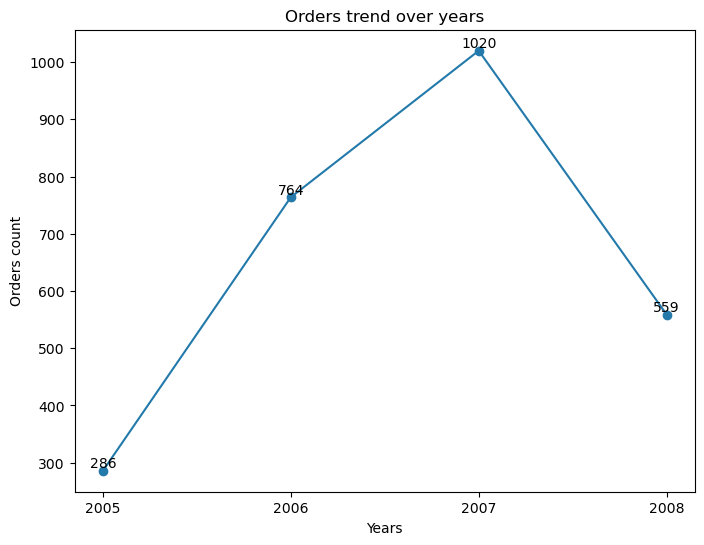

In [7]:
# create the line graph
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(data2['OrderDate_year'], data2['uniqueSalesOrders'], marker='o', color = '#2279aa')

# set the axis labels and chart title
ax.set_xlabel('Years')
ax.set_ylabel('Orders count')
ax.set_title('Orders trend over years')

# add data labels to the line graph
for x, y in zip(data2['OrderDate_year'], data2['uniqueSalesOrders']):
    ax.text(x, y, str(y), ha='center', va='bottom')

# display the chart
plt.show()


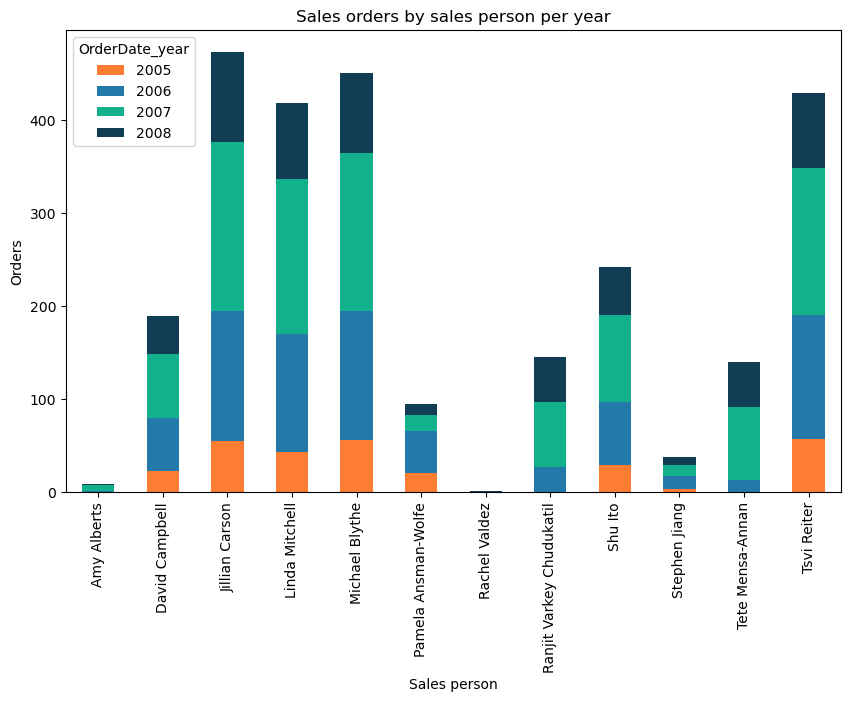

In [8]:
df=data1.groupby(['Sales_Person','OrderDate_year'])['SalesOrderNumber'].nunique().reset_index(name='count')

# group the data by OrderDate_year and Sales_Person
grouped = df.groupby(['Sales_Person', 'OrderDate_year'])['count'].sum().unstack()
from matplotlib.colors import ListedColormap

colorsforchart = ListedColormap(['#ff7c33', '#2279aa', '#13b18b','#113d55'])

# create the grouped stacked bar graph
fig, ax = plt.subplots(figsize=(10, 6))
grouped.plot(kind='bar', stacked=True, ax=ax, cmap=colorsforchart)
    
# set the axis labels and chart title
ax.set_xlabel('Sales person')
ax.set_ylabel('Orders')
ax.set_title('Sales orders by sales person per year')

# display the chart
plt.show()

In [9]:
df_sc=data1.groupby(['Sales_Region','OrderDate_year'])['SalesOrderNumber'].nunique().reset_index(name='count') 
cs=data1.groupby(['Sales_Region','OrderDate_year'])['CompanyExpensesForOrderQty'].sum().reset_index(name='CompanyExpensesForOrderQty') 
df_sc = df_sc.merge(cs, on = ['Sales_Region','OrderDate_year'])
df_sc = df_sc.sort_values(['count'])
df_sc

,Sales_Region,OrderDate_year,count,CompanyExpensesForOrderQty
3,Germany,2008,1,3.372200e+02
0,France,2006,27,2.746950e+07
2,France,2008,48,2.059063e+06
1,France,2007,70,1.757474e+07
4,United States,2005,286,1.115334e+07
7,United States,2008,510,1.570779e+07
5,United States,2006,737,4.347814e+08
6,United States,2007,950,2.661659e+08


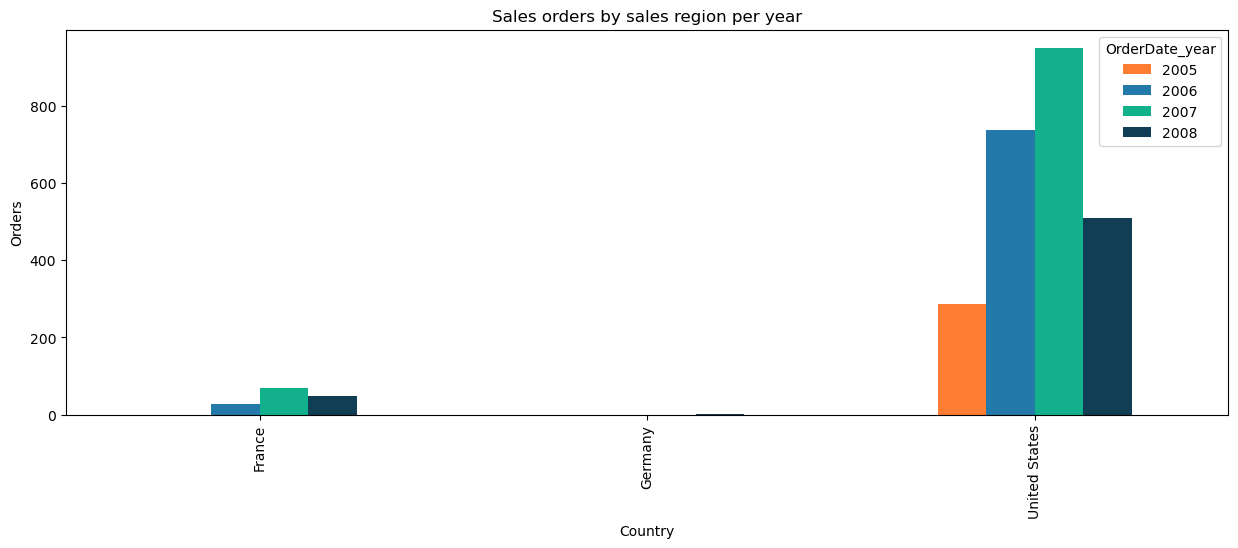

In [10]:
colorsforchart = ListedColormap(['#ff7c33', '#2279aa', '#13b18b','#113d55'])

df_sc.pivot(index='Sales_Region', columns = 'OrderDate_year', values = 'count').plot(kind='bar', figsize=(15,5), cmap=colorsforchart)
plt.xlabel('Country')
plt.ylabel('Orders')
plt.title('Sales orders by sales region per year')
plt.show()

In [11]:
df_yspr=data1.groupby(['Sales_Region','Sales_City','OrderDate_year'])['Sales_Person'].nunique().reset_index(name='Tot_Salesppl')
df_yspr = df_yspr.merge(data1.groupby(['Sales_Region','Sales_City','OrderDate_year'])['SalesOrderNumber'].nunique().reset_index(name='Tot_orders'), on = ['Sales_Region','Sales_City','OrderDate_year'])

df_yspr

,Sales_Region,Sales_City,OrderDate_year,Tot_Salesppl,Tot_orders
0,France,Bordeaux,2006,1,27
1,France,Bordeaux,2007,1,70
2,France,Bordeaux,2008,1,48
3,Germany,Berlin,2008,1,1
4,United States,Bellevue,2005,1,23
5,United States,Bellevue,2006,1,56
6,United States,Bellevue,2007,1,69
7,United States,Bellevue,2008,1,41
8,United States,Cambridge,2006,1,13
9,United States,Cambridge,2007,1,78


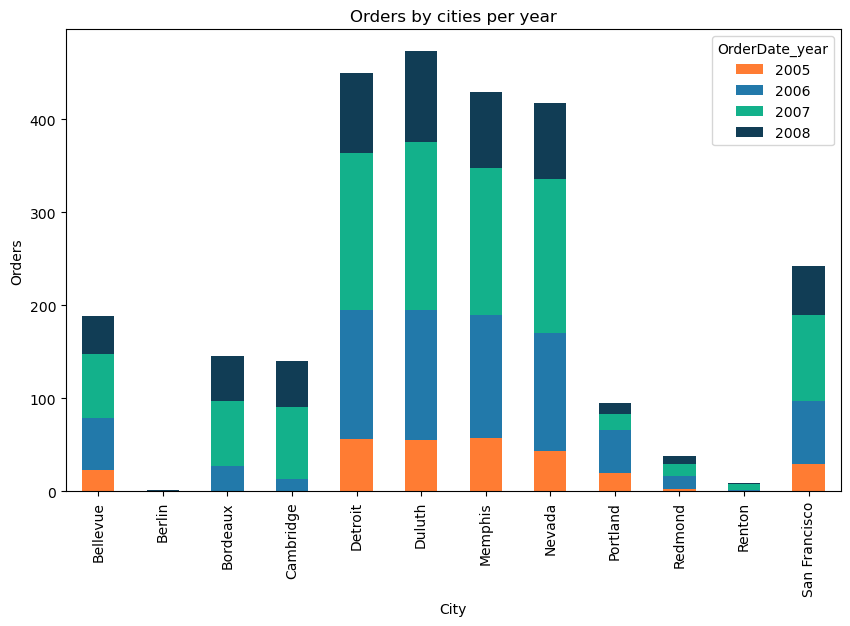

In [12]:
# group the data by OrderDate_year and Sales_Person
grouped = df_yspr.groupby(['Sales_City', 'OrderDate_year'])['Tot_orders'].sum().unstack()

colorsforchart = ListedColormap(['#ff7c33', '#2279aa', '#13b18b','#113d55'])

# create the grouped stacked bar graph
fig, ax = plt.subplots(figsize=(10, 6))
grouped.plot(kind='bar', stacked=True, ax=ax, cmap=colorsforchart)
    
# set the axis labels and chart title
ax.set_xlabel('City')
ax.set_ylabel('Orders')
ax.set_title('Orders by cities per year')

# display the chart
plt.show()

In [13]:
df_oqs=data1.groupby(['Product_Category','OrderDate_year'])['OrderQty'].sum().reset_index(name='QtySold') 
oqs=data1.groupby(['Product_Category','OrderDate_year'])['CustomerExpensesForOrderQty'].sum().reset_index(name='CustomerExpensesForOrderQty') 

df_oqs = df_oqs.merge(oqs, on = ['Product_Category','OrderDate_year'])
df_oqs

,Product_Category,OrderDate_year,QtySold,CustomerExpensesForOrderQty
0,Accessories,2005,748,5.404745e+08
1,Accessories,2006,3644,1.798745e+09
2,Accessories,2007,7762,3.011674e+09
3,Accessories,2008,3638,2.510982e+10
4,Bikes,2005,4803,6.251679e+10
5,Bikes,2006,16825,1.722591e+11
6,Bikes,2007,21673,1.820972e+11
7,Bikes,2008,10243,3.803627e+12
8,Clothing,2005,1664,1.439228e+09
9,Clothing,2006,11967,7.497790e+09


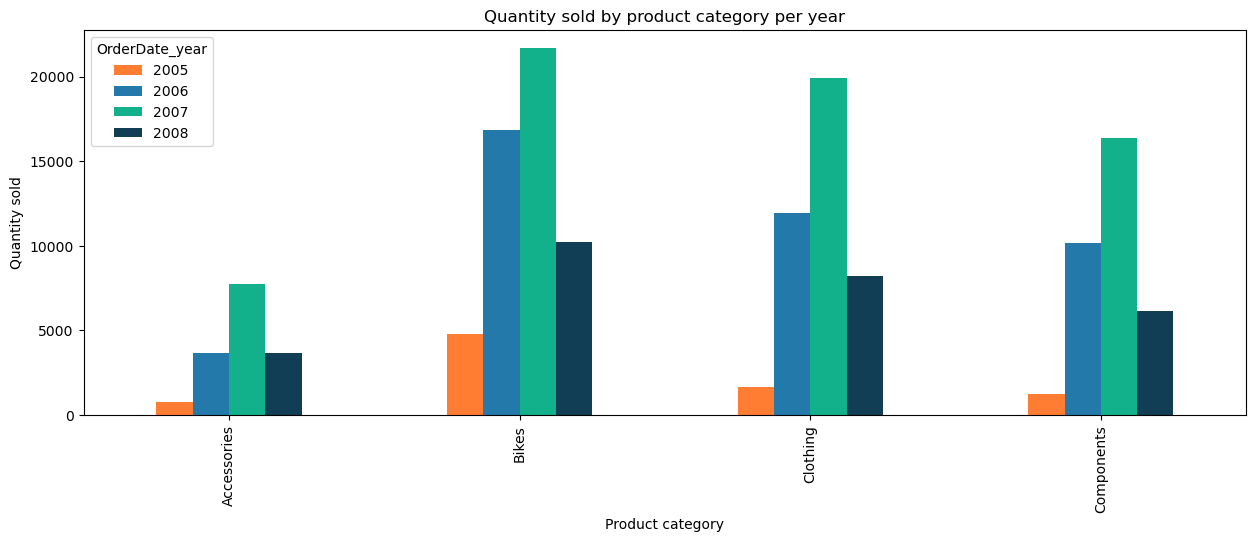

In [14]:
colorsforchart = ListedColormap(['#ff7c33', '#2279aa', '#13b18b','#113d55'])

df_oqs.pivot(index='Product_Category', columns = 'OrderDate_year', values = 'QtySold').plot(kind='bar', figsize=(15,5), cmap=colorsforchart)
plt.xlabel('Product category')
plt.ylabel('Quantity sold')
plt.title('Quantity sold by product category per year')
plt.show()

In [15]:
df_ycus=data1.groupby(['OrderDate_year'])['Customer_Name'].nunique().reset_index(name='Tot_customers') 
df_ycus = df_ycus.merge(data1.groupby(['OrderDate_year'])['CustomerExpensesForOrderQty'].sum().reset_index(name='CustomerExpensesForOrderQty'), on = ['OrderDate_year'])

df_ycus

,OrderDate_year,Tot_customers,CustomerExpensesForOrderQty
0,2005,159,6.880628e+10
1,2006,311,2.084946e+11
2,2007,356,2.326240e+11
3,2008,291,4.427187e+12


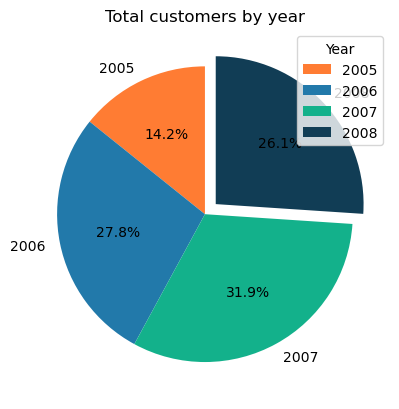

In [16]:
# define custom colors for the pie chart
colorsforchart = ['#ff7c33', '#2279aa', '#13b18b','#113d55']

# create the pie chart
plt.pie(df_ycus['Tot_customers'], labels=df_ycus['OrderDate_year'], explode=(0, 0, 0, 0.1 ), autopct='%1.1f%%', startangle=90, colors=colorsforchart)

# add title and legend
plt.title('Total customers by year')
plt.legend(title='Year', loc='upper right')

# show the plot
plt.show()

In [17]:
df_ycr=data1.groupby(['Customer_Region','OrderDate_year'])['Customer_Name'].nunique().reset_index(name='Tot_customers')
df_ycr = df_ycr.merge(data1.groupby(['Customer_Region','OrderDate_year'])['SalesOrderNumber'].nunique().reset_index(name='Tot_orders'), on = ['Customer_Region','OrderDate_year'])

df_ycr

,Customer_Region,OrderDate_year,Tot_customers,Tot_orders
0,France,2006,15,28
1,France,2007,29,77
2,France,2008,26,49
3,Germany,2008,1,1
4,United States,2005,159,286
5,United States,2006,297,736
6,United States,2007,328,943
7,United States,2008,264,509


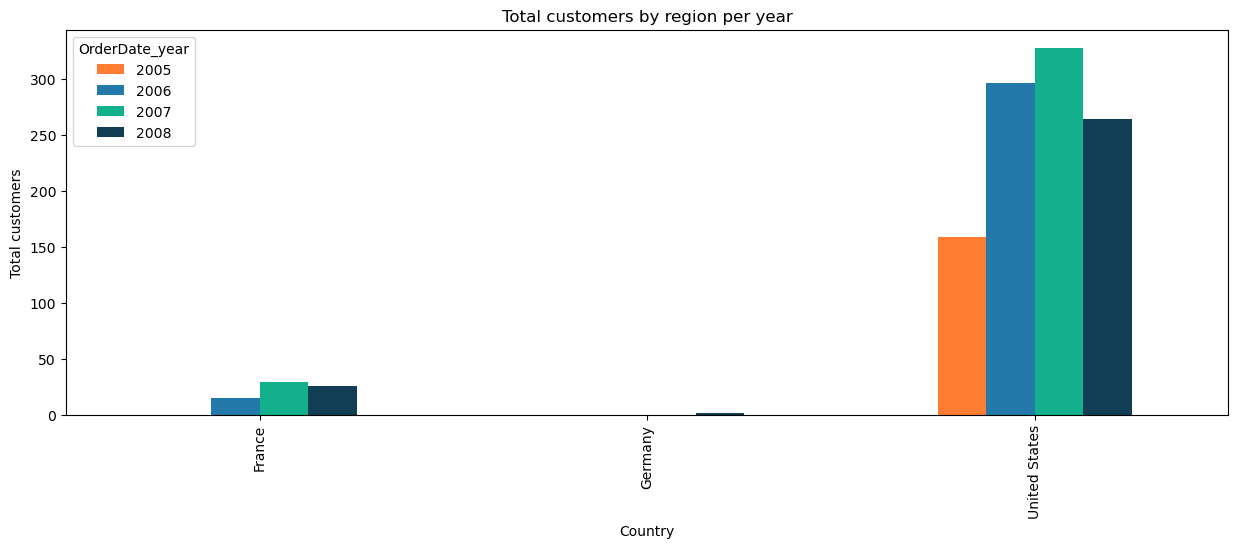

In [18]:
colorsforchart = ListedColormap(['#ff7c33', '#2279aa', '#13b18b','#113d55'])

df_ycr.pivot(index='Customer_Region', columns = 'OrderDate_year', values = 'Tot_customers').plot(kind='bar', figsize=(15,5), cmap=colorsforchart)
plt.xlabel('Country')
plt.ylabel('Total customers')
plt.title('Total customers by region per year')
plt.show()

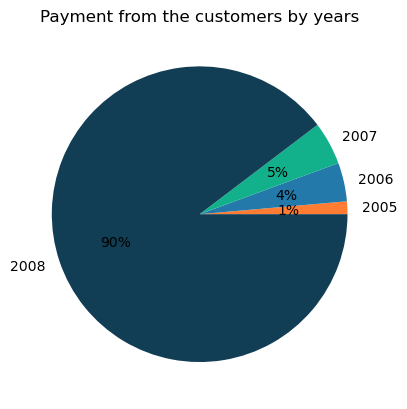

In [19]:
# define custom colors for the pie chart
colors = ['#ff7c33', '#2279aa', '#13b18b','#113d55']

# show the plot
plt.show()

expenses_by_year1 = data1.groupby('OrderDate_year')['CustomerExpensesForOrderQty'].sum()

# Create the pie chart
plt.pie(expenses_by_year1, labels=expenses_by_year1.index, autopct='%1.0f%%', colors=colors)
plt.title('Payment from the customers by years')
plt.show()

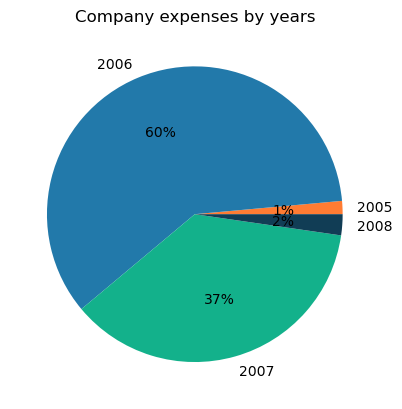

In [20]:
# define custom colors for the pie chart
colors = ['#ff7c33', '#2279aa', '#13b18b','#113d55']

# show the plot
plt.show()

expenses_by_year1 = data1.groupby('OrderDate_year')['CompanyExpensesForOrderQty'].sum()

# Create the pie chart
plt.pie(expenses_by_year1, labels=expenses_by_year1.index, autopct='%1.0f%%', colors=colors)
plt.title('Company expenses by years')
plt.show()

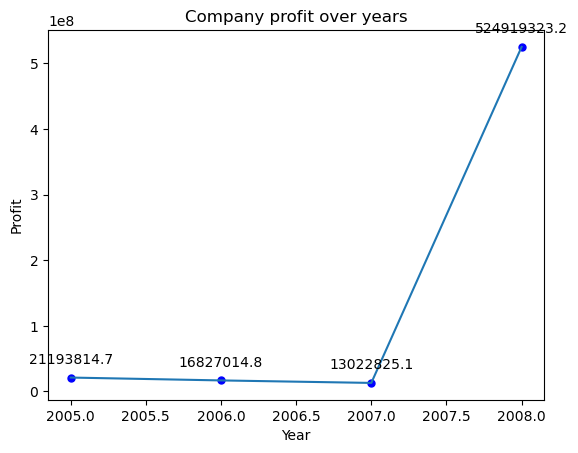

In [21]:
# Group the data by year and calculate the mean profit or gain
profit_by_year = data1.groupby('OrderDate_year')['CompanyProfitorGain'].mean()

# Create the line graph
fig, ax = plt.subplots()
ax.plot(profit_by_year.index, profit_by_year.values)

# Add data labels and values to the line graph
for x, y in zip(profit_by_year.index, profit_by_year.values):
    ax.annotate(f'{y:.1f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
    ax.scatter(x, y, c='blue', s=25)

# Set the chart title, axis labels, and display the chart
ax.set_title('Company profit over years')
ax.set_xlabel('Year')
ax.set_ylabel('Profit')
plt.show()


In [22]:
s1=data1.groupby('OrderDate_year')['SalesOrderNumber'].nunique().reset_index(name='OrdersSold') 
a=data1.groupby(['OrderDate_year'])['OrderQty'].sum().reset_index(name='OrderQty') 
s1 = s1.merge(a, on = ['OrderDate_year'])

s1

,OrderDate_year,OrdersSold,OrderQty
0,2005,286,8431
1,2006,764,42626
2,2007,1020,65700
3,2008,559,28268


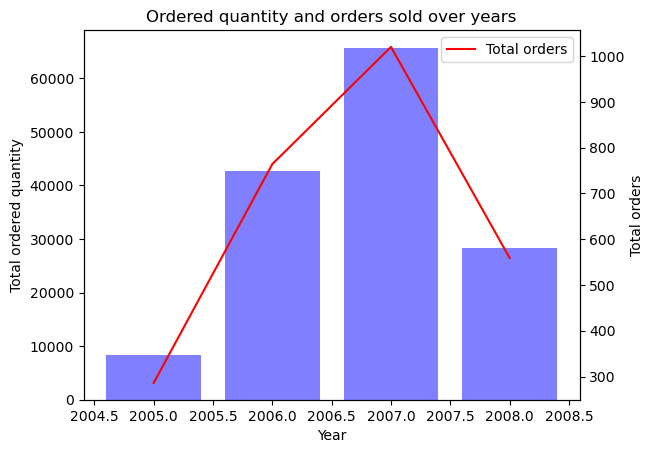

In [23]:
# Create a figure and axis object
fig, ax1 = plt.subplots()

# Create a bar plot for OrderQty
ax1.bar(s1['OrderDate_year'], s1['OrderQty'], color='b', alpha=0.5)

# Set the y-axis label
ax1.set_ylabel('Total ordered quantity')

# Create a second axis object that shares the same x-axis as the first axis
ax2 = ax1.twinx()

# Create a line plot for CustomerExpensesForOrderQty
ax2.plot(s1['OrderDate_year'], s1['OrdersSold'], color='r', label='Total orders')
    
# Set the y-axis label for the second axis
ax2.set_ylabel('Total orders')

# Add a legend
ax2.legend()

# Set the title and x-axis label
ax1.set_title('Ordered quantity and orders sold over years')
ax1.set_xlabel('Year')

# Display the plot
plt.show()


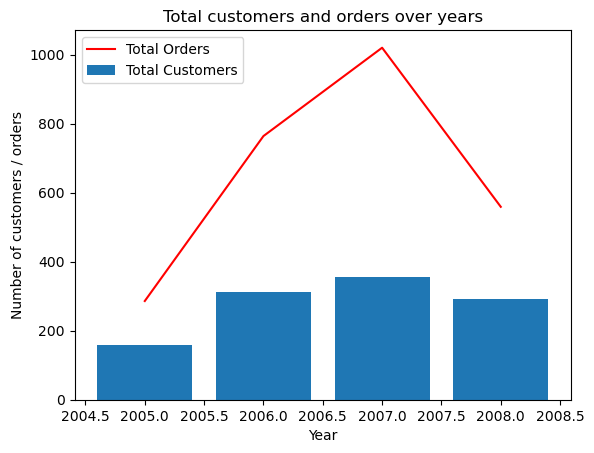

In [24]:
# Group the dataframe by OrderDate_year and calculate the sum of Tot_customers and Tot_orders
df_grouped = df_ycr.groupby('OrderDate_year').agg({'Tot_customers': 'sum', 'Tot_orders': 'sum'})

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the Tot_customers as a bar chart
ax.bar(df_grouped.index, df_grouped['Tot_customers'], label='Total Customers')

# Plot the Tot_orders as a line chart
ax.plot(df_grouped.index, df_grouped['Tot_orders'], color='red', label='Total Orders')

# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of customers / orders')
ax.set_title('Total customers and orders over years')

# Set the legend and show the plot
ax.legend()
plt.show()


In [25]:
df_cus=data1.groupby(['Customer_Name'])['SalesOrderNumber'].nunique().reset_index(name='count')    
df_cus=df_cus.sort_values(['count'], ascending = False).head(10)
df_cus

,Customer_Name,count
135,Friendly Bike Shop,15
94,Excellent Riding Supplies,12
323,Small Bike Shop,12
163,Great Bikes,12
345,Super Sports Store,12
35,Bike Goods,12
123,First Bike Store,12
339,Sturdy Toys,12
168,Highway Bike Shop,12
43,Brakes and Gears,12


In [26]:
#Top 10 customers
mdf1 = pd.merge(data1, df_cus, on=['Customer_Name'])
c2005 = mdf1.where(mdf1['OrderDate_year'] == 2005).groupby('Customer_Name')['SalesOrderNumber'].nunique().reset_index(name='2005')
c2006 = mdf1.where(mdf1['OrderDate_year'] == 2006).groupby('Customer_Name')['SalesOrderNumber'].nunique().reset_index(name='2006') 
c2007 = mdf1.where(mdf1['OrderDate_year'] == 2007).groupby('Customer_Name')['SalesOrderNumber'].nunique().reset_index(name='2007') 
c2008 = mdf1.where(mdf1['OrderDate_year'] == 2008).groupby('Customer_Name')['SalesOrderNumber'].nunique().reset_index(name='2008')
mdf11 = mdf1.groupby(['Customer_Name'])['count'].mean().reset_index(name='TotalOrders') 
mdf11 = mdf11.merge(c2005, on = ['Customer_Name'])
mdf11 = mdf11.merge(c2006, on = ['Customer_Name'])
mdf11 = mdf11.merge(c2007, on = ['Customer_Name'])
mdf11 = mdf11.merge(c2008, on = ['Customer_Name'])
mdf11


,Customer_Name,TotalOrders,2005,2006,2007,2008
0,Bike Goods,12.0,2,4,4,2
1,Brakes and Gears,12.0,2,4,4,2
2,Excellent Riding Supplies,12.0,2,4,4,2
3,First Bike Store,12.0,2,4,4,2
4,Friendly Bike Shop,15.0,1,6,6,2
5,Great Bikes,12.0,2,4,4,2
6,Highway Bike Shop,12.0,2,4,4,2
7,Small Bike Shop,12.0,2,4,4,2
8,Sturdy Toys,12.0,2,4,4,2
9,Super Sports Store,12.0,2,4,4,2


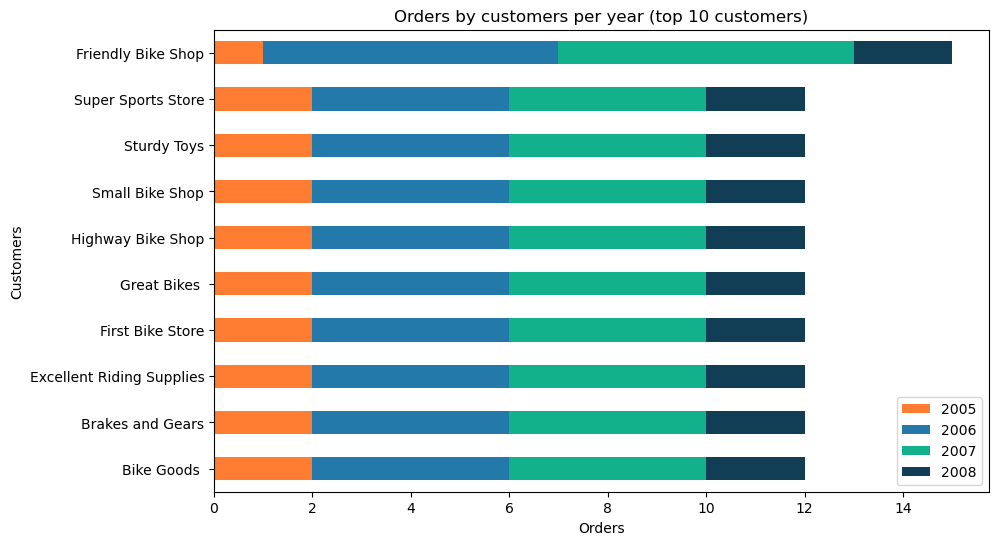

In [27]:
colorsforchart = ListedColormap(['#ff7c33', '#2279aa', '#13b18b','#113d55'])

# create the grouped stacked bar graph
mdf11= mdf11.sort_values('TotalOrders')
fig, ax = plt.subplots(figsize=(10, 6))
mdf11.plot(x="Customer_Name", y=["2005", "2006",'2007','2008'],kind='barh', stacked=True, ax=ax, cmap=colorsforchart)
    
# set the axis labels and chart title
ax.set_xlabel('Orders')
ax.set_ylabel('Customers')
ax.set_title('Orders by customers per year (top 10 customers)')

# display the chart
plt.show()

In [28]:
df_cus_l20=data1.groupby(['Customer_Name'])['SalesOrderNumber'].nunique().reset_index(name='count')    
df_cus_l20=df_cus_l20.sort_values(['count'], ascending=True).head(10)
df_cus_l20

,Customer_Name,count
296,Road-Way Mart,1
175,Imported and Domestic Cycles,1
400,Weekend Bike Tours,1
285,Retail Cycle Shop,1
397,Versatile Sporting Goods Company,1
75,Discount Bicycle Specialists,1
214,Mobile Outlet,1
288,Retail Sporting Goods,1
359,The Cycle Store,1
294,Riding Excursions,1


In [29]:
#Last 10 customers
mdf2 = pd.merge(data1, df_cus_l20, on=['Customer_Name'])
c20051 = mdf2.where(mdf2['OrderDate_year'] == 2005).groupby('Customer_Name')['SalesOrderNumber'].nunique().reset_index(name='2005')
c20061 = mdf2.where(mdf2['OrderDate_year'] == 2006).groupby('Customer_Name')['SalesOrderNumber'].nunique().reset_index(name='2006') 
c20071 = mdf2.where(mdf2['OrderDate_year'] == 2007).groupby('Customer_Name')['SalesOrderNumber'].nunique().reset_index(name='2007') 
c20081 = mdf2.where(mdf2['OrderDate_year'] == 2008).groupby('Customer_Name')['SalesOrderNumber'].nunique().reset_index(name='2008')
mdf22 = mdf2.groupby(['Customer_Name'])['count'].mean().reset_index(name='TotalOrders') 
mdf22 = mdf22.merge(c20051, on = ['Customer_Name'], how='outer')
mdf22 = mdf22.merge(c20061, on = ['Customer_Name'], how='outer')
mdf22 = mdf22.merge(c20071, on = ['Customer_Name'], how='outer')
mdf22 = mdf22.merge(c20081, on = ['Customer_Name'], how='outer')
mdf22


,Customer_Name,TotalOrders,2005,2006,2007,2008
0,Discount Bicycle Specialists,1.0,1.0,NaN,NaN,NaN
1,Imported and Domestic Cycles,1.0,NaN,NaN,1.0,NaN
2,Mobile Outlet,1.0,NaN,NaN,1.0,NaN
3,Retail Cycle Shop,1.0,NaN,1.0,NaN,NaN
4,Retail Sporting Goods,1.0,NaN,1.0,NaN,NaN
5,Riding Excursions,1.0,NaN,1.0,NaN,NaN
6,Road-Way Mart,1.0,NaN,1.0,NaN,NaN
7,The Cycle Store,1.0,NaN,NaN,1.0,NaN
8,Versatile Sporting Goods Company,1.0,NaN,NaN,NaN,1.0
9,Weekend Bike Tours,1.0,NaN,NaN,1.0,NaN


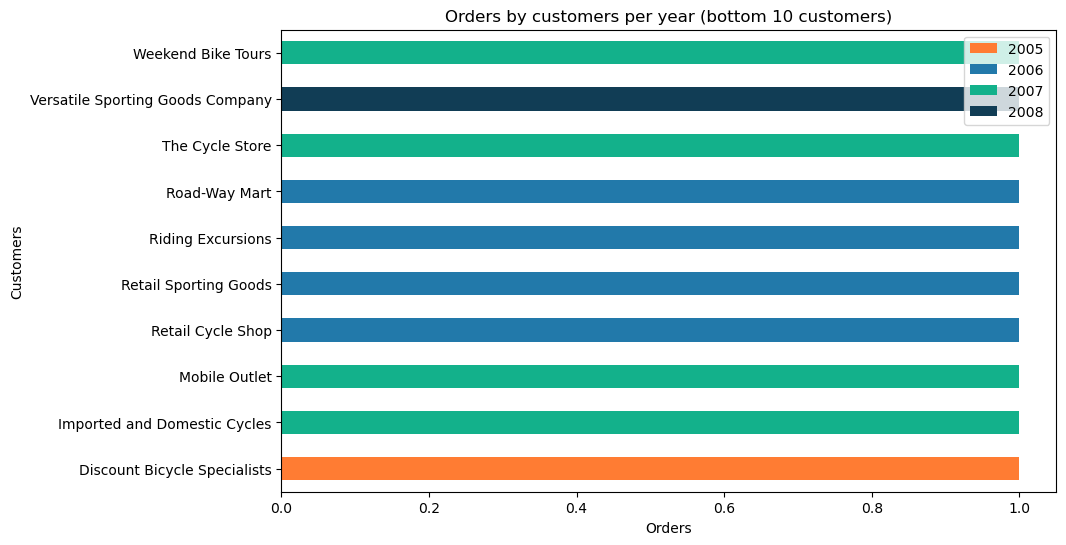

In [30]:
colorsforchart = ListedColormap(['#ff7c33', '#2279aa', '#13b18b','#113d55'])

# create the grouped stacked bar graph
mdf22= mdf22.sort_values('TotalOrders')
fig, ax = plt.subplots(figsize=(10, 6))
mdf22.plot(x="Customer_Name", y=["2005", "2006",'2007','2008'],kind='barh', stacked=True, ax=ax, cmap=colorsforchart)
    
# set the axis labels and chart title
ax.set_xlabel('Orders')
ax.set_ylabel('Customers')
ax.set_title('Orders by customers per year (bottom 10 customers)')

# display the chart
plt.show()

In [31]:
df_ycr_city=data1.groupby(['Customer_Region','Customer_City'])['Customer_Name'].nunique().reset_index(name='Tot_customers')
df_ycr_city = df_ycr_city.merge(data1.groupby(['Customer_Region','Customer_City'])['SalesOrderNumber'].nunique().reset_index(name='Tot_orders'), on = ['Customer_Region','Customer_City'])
df_ycr_city=df_ycr_city.sort_values(['Tot_orders'], ascending = False).head(10)
df_ycr_city

,Customer_Region,Customer_City,Tot_customers,Tot_orders
175,United States,Miami,9,48
11,France,Paris,9,43
122,United States,Houston,4,40
248,United States,San Antonio,5,34
265,United States,Seattle,4,28
218,United States,Phoenix,3,28
227,United States,Puyallup,4,28
170,United States,Memphis,4,27
63,United States,Chicago,5,26
244,United States,Saint Louis,4,25


In [32]:
#Top 10 cities
mdf3 = pd.merge(data1, df_ycr_city, on=['Customer_City'])
c20053 = mdf3.where(mdf3['OrderDate_year'] == 2005).groupby('Customer_City')['SalesOrderNumber'].nunique().reset_index(name='2005')
c20063 = mdf3.where(mdf3['OrderDate_year'] == 2006).groupby('Customer_City')['SalesOrderNumber'].nunique().reset_index(name='2006') 
c20073 = mdf3.where(mdf3['OrderDate_year'] == 2007).groupby('Customer_City')['SalesOrderNumber'].nunique().reset_index(name='2007') 
c20083 = mdf3.where(mdf3['OrderDate_year'] == 2008).groupby('Customer_City')['SalesOrderNumber'].nunique().reset_index(name='2008')
mdf33 = mdf3.groupby(['Customer_City'])['Tot_orders'].mean().reset_index(name='TotalOrders') 
mdf33 = mdf33.merge(c20053, on = ['Customer_City'], how='outer')
mdf33 = mdf33.merge(c20063, on = ['Customer_City'], how='outer')
mdf33 = mdf33.merge(c20073, on = ['Customer_City'], how='outer')
mdf33 = mdf33.merge(c20083, on = ['Customer_City'], how='outer')
mdf33


,Customer_City,TotalOrders,2005,2006,2007,2008
0,Chicago,26.0,1.0,9,12,4
1,Houston,40.0,6.0,12,14,8
2,Memphis,27.0,5.0,12,8,2
3,Miami,48.0,3.0,14,21,10
4,Paris,43.0,NaN,8,23,12
5,Phoenix,28.0,2.0,8,12,6
6,Puyallup,28.0,2.0,6,12,8
7,Saint Louis,25.0,2.0,6,10,7
8,San Antonio,34.0,6.0,14,9,5
9,Seattle,28.0,6.0,10,8,4


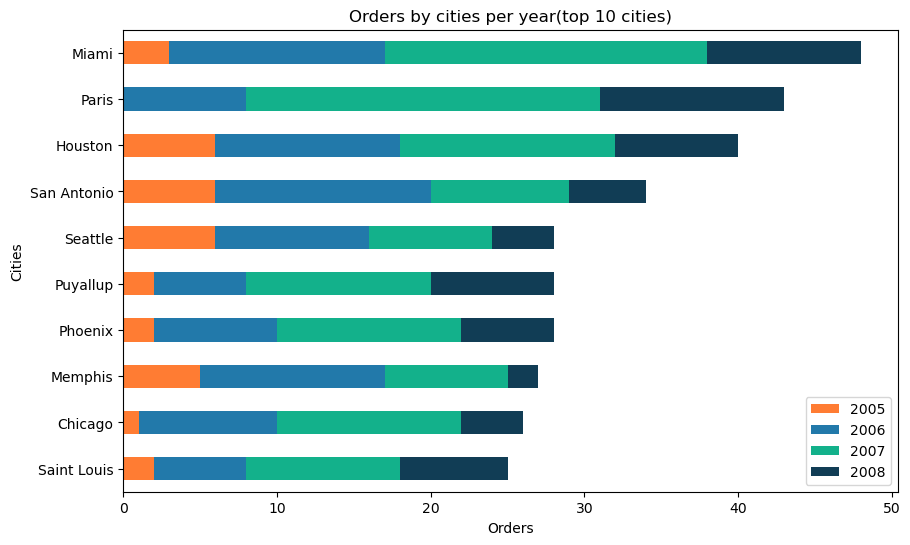

In [33]:
colorsforchart = ListedColormap(['#ff7c33', '#2279aa', '#13b18b','#113d55'])

# create the grouped stacked bar graph
mdf33= mdf33.sort_values('TotalOrders')
fig, ax = plt.subplots(figsize=(10, 6))
mdf33.plot(x="Customer_City", y=["2005", "2006",'2007','2008'],kind='barh', stacked=True, ax=ax, cmap=colorsforchart)
    
# set the axis labels and chart title
ax.set_xlabel('Orders')
ax.set_ylabel('Cities')
ax.set_title('Orders by cities per year(top 10 cities)')

# display the chart
plt.show()

In [34]:
df_ycr_city_l20=data1.groupby(['Customer_Region','Customer_City'])['Customer_Name'].nunique().reset_index(name='Tot_customers')
df_ycr_city_l20 = df_ycr_city_l20.merge(data1.groupby(['Customer_Region','Customer_City'])['SalesOrderNumber'].nunique().reset_index(name='Tot_orders'), on = ['Customer_Region','Customer_City'])
df_ycr_city_l20=df_ycr_city_l20.sort_values(['Tot_orders'], ascending = True).head(10)
df_ycr_city_l20

,Customer_Region,Customer_City,Tot_customers,Tot_orders
309,United States,Westport,1,1
184,United States,Missoula,1,1
134,United States,Kannapolis,1,1
19,Germany,Braunschweig,1,1
137,United States,Kendall,1,1
16,France,Suresnes,1,1
293,United States,Tupelo,1,1
312,United States,Wood Dale,1,1
202,United States,North Las Vegas,1,1
128,United States,Irvine,1,1


In [35]:
#Last 10 cities
mdf4 = pd.merge(data1, df_ycr_city_l20, on=['Customer_City'])
c20054 = mdf4.where(mdf4['OrderDate_year'] == 2005).groupby('Customer_City')['SalesOrderNumber'].nunique().reset_index(name='2005')
c20064 = mdf4.where(mdf4['OrderDate_year'] == 2006).groupby('Customer_City')['SalesOrderNumber'].nunique().reset_index(name='2006') 
c20074 = mdf4.where(mdf4['OrderDate_year'] == 2007).groupby('Customer_City')['SalesOrderNumber'].nunique().reset_index(name='2007') 
c20084 = mdf4.where(mdf4['OrderDate_year'] == 2008).groupby('Customer_City')['SalesOrderNumber'].nunique().reset_index(name='2008')
mdf44 = mdf4.groupby(['Customer_City'])['Tot_orders'].mean().reset_index(name='TotalOrders') 
mdf44 = mdf44.merge(c20054, on = ['Customer_City'], how='outer')
mdf44 = mdf44.merge(c20064, on = ['Customer_City'], how='outer')
mdf44 = mdf44.merge(c20074, on = ['Customer_City'], how='outer')
mdf44 = mdf44.merge(c20084, on = ['Customer_City'], how='outer')
mdf44


,Customer_City,TotalOrders,2005,2006,2007,2008
0,Braunschweig,1.0,NaN,NaN,NaN,1.0
1,Irvine,1.0,NaN,1.0,NaN,NaN
2,Kannapolis,1.0,NaN,NaN,NaN,1.0
3,Kendall,1.0,NaN,NaN,1.0,NaN
4,Missoula,1.0,NaN,1.0,NaN,NaN
5,North Las Vegas,1.0,NaN,NaN,1.0,NaN
6,Suresnes,1.0,NaN,1.0,NaN,NaN
7,Tupelo,1.0,NaN,1.0,NaN,NaN
8,Westport,1.0,1.0,NaN,NaN,NaN
9,Wood Dale,1.0,1.0,NaN,NaN,NaN


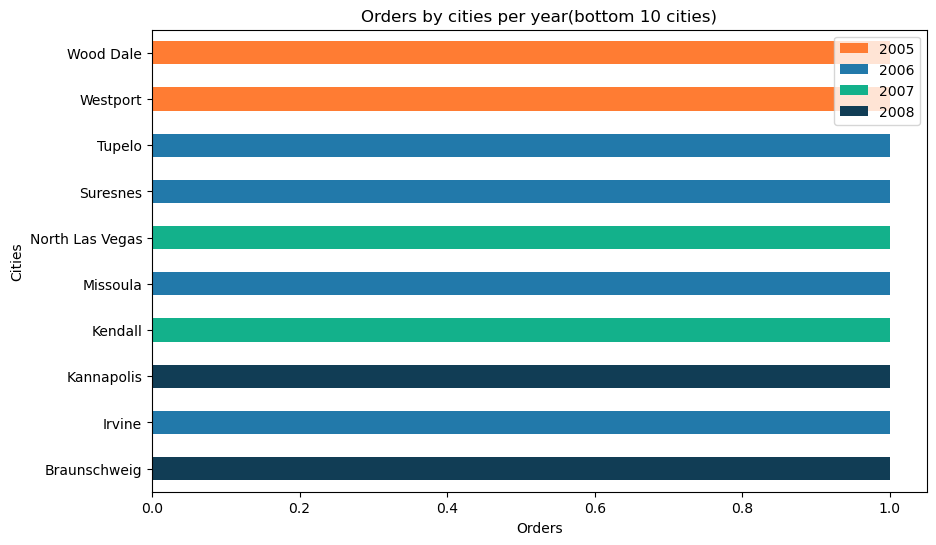

In [36]:
colorsforchart = ListedColormap(['#ff7c33', '#2279aa', '#13b18b','#113d55'])

# create the grouped stacked bar graph
mdf44= mdf44.sort_values('TotalOrders')
fig, ax = plt.subplots(figsize=(10, 6))
mdf44.plot(x="Customer_City", y=["2005", "2006",'2007','2008'],kind='barh', stacked=True, ax=ax, cmap=colorsforchart)
    
# set the axis labels and chart title
ax.set_xlabel('Orders')
ax.set_ylabel('Cities')
ax.set_title('Orders by cities per year(bottom 10 cities)')

# display the chart
plt.show()

In [37]:
df_psc=data1.groupby(['Product_Sub_Category'])['OrderQty'].sum().reset_index(name='QtySold') 
psc=data1.groupby(['Product_Sub_Category'])['CustomerExpensesForOrderQty'].sum().reset_index(name='CustomerExpensesForOrderQty') 

df_psc = df_psc.merge(psc, on = ['Product_Sub_Category'])
df_psc=df_psc.sort_values(['QtySold'], ascending = False).head(5)
df_psc

,Product_Sub_Category,QtySold,CustomerExpensesForOrderQty
22,Road Bikes,29310,1.050726e+12
18,Mountain Bikes,17377,1.826303e+12
16,Jerseys,11821,9.123641e+10
23,Road Frames,8427,7.734408e+10
19,Mountain Frames,8403,1.271700e+11


In [38]:
#Top 5 Product sub categories
mdf5 = pd.merge(data1, df_psc, on=['Product_Sub_Category'])
c20055 = mdf5.where(mdf5['OrderDate_year'] == 2005).groupby('Product_Sub_Category')['OrderQty'].sum().reset_index(name='2005')
c20065 = mdf5.where(mdf5['OrderDate_year'] == 2006).groupby('Product_Sub_Category')['OrderQty'].sum().reset_index(name='2006') 
c20075 = mdf5.where(mdf5['OrderDate_year'] == 2007).groupby('Product_Sub_Category')['OrderQty'].sum().reset_index(name='2007') 
c20085 = mdf5.where(mdf5['OrderDate_year'] == 2008).groupby('Product_Sub_Category')['OrderQty'].sum().reset_index(name='2008')
mdf55 = mdf5.groupby(['Product_Sub_Category'])['QtySold'].mean().reset_index(name='TotalOrders') 
mdf55 = mdf55.merge(c20055, on = ['Product_Sub_Category'], how='outer')
mdf55 = mdf55.merge(c20065, on = ['Product_Sub_Category'], how='outer')
mdf55 = mdf55.merge(c20075, on = ['Product_Sub_Category'], how='outer')
mdf55 = mdf55.merge(c20085, on = ['Product_Sub_Category'], how='outer')
mdf55


,Product_Sub_Category,TotalOrders,2005,2006,2007,2008
0,Jerseys,11821.0,749.0,2742.0,5658.0,2672.0
1,Mountain Bikes,17377.0,1908.0,5537.0,6817.0,3115.0
2,Mountain Frames,8403.0,403.0,2118.0,4134.0,1748.0
3,Road Bikes,29310.0,2895.0,11288.0,11159.0,3968.0
4,Road Frames,8427.0,813.0,3839.0,3135.0,640.0


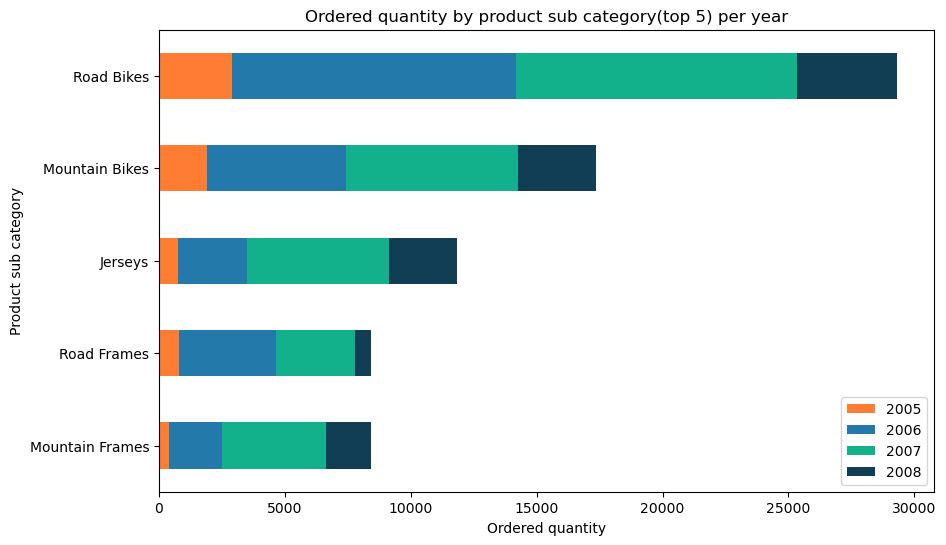

In [39]:
colorsforchart = ListedColormap(['#ff7c33', '#2279aa', '#13b18b','#113d55'])

# create the grouped stacked bar graph
mdf55= mdf55.sort_values('TotalOrders')
fig, ax = plt.subplots(figsize=(10, 6))
mdf55.plot(x="Product_Sub_Category", y=["2005", "2006",'2007','2008'],kind='barh', stacked=True, ax=ax, cmap=colorsforchart)
    
# set the axis labels and chart title
ax.set_xlabel('Ordered quantity')
ax.set_ylabel('Product sub category')
ax.set_title('Ordered quantity by product sub category(top 5) per year')

# display the chart
plt.show()


In [40]:
df_psc_l20=data1.groupby(['Product_Sub_Category'])['OrderQty'].sum().reset_index(name='QtySold') 
psc_l20=data1.groupby(['Product_Sub_Category'])['CustomerExpensesForOrderQty'].sum().reset_index(name='CustomerExpensesForOrderQty') 

df_psc_120 = df_psc_l20.merge(psc_l20, on = ['Product_Sub_Category'])
df_psc_l20=df_psc_l20.sort_values(['QtySold'], ascending = True).head(5)
df_psc_l20

,Product_Sub_Category,QtySold
28,Tires and Tubes,404
10,Forks,455
6,Chains,512
3,Bottom Brackets,577
4,Brakes,653


In [41]:
#Last 5 Product sub categories
mdf6 = pd.merge(data1, df_psc_l20, on=['Product_Sub_Category'])
c20056 = mdf6.where(mdf6['OrderDate_year'] == 2005).groupby('Product_Sub_Category')['OrderQty'].sum().reset_index(name='2005')
c20066 = mdf6.where(mdf6['OrderDate_year'] == 2006).groupby('Product_Sub_Category')['OrderQty'].sum().reset_index(name='2006') 
c20076 = mdf6.where(mdf6['OrderDate_year'] == 2007).groupby('Product_Sub_Category')['OrderQty'].sum().reset_index(name='2007') 
c20086 = mdf6.where(mdf6['OrderDate_year'] == 2008).groupby('Product_Sub_Category')['OrderQty'].sum().reset_index(name='2008')
mdf66 = mdf6.groupby(['Product_Sub_Category'])['QtySold'].mean().reset_index(name='TotalOrders') 
mdf66 = mdf66.merge(c20056, on = ['Product_Sub_Category'], how='outer')
mdf66 = mdf66.merge(c20066, on = ['Product_Sub_Category'], how='outer')
mdf66 = mdf66.merge(c20076, on = ['Product_Sub_Category'], how='outer')
mdf66 = mdf66.merge(c20086, on = ['Product_Sub_Category'], how='outer')
mdf66


,Product_Sub_Category,TotalOrders,2005,2006,2007,2008
0,Bottom Brackets,577.0,NaN,NaN,347.0,230.0
1,Brakes,653.0,NaN,NaN,443.0,210.0
2,Chains,512.0,NaN,NaN,315.0,197.0
3,Forks,455.0,NaN,291.0,164.0,NaN
4,Tires and Tubes,404.0,NaN,NaN,296.0,108.0


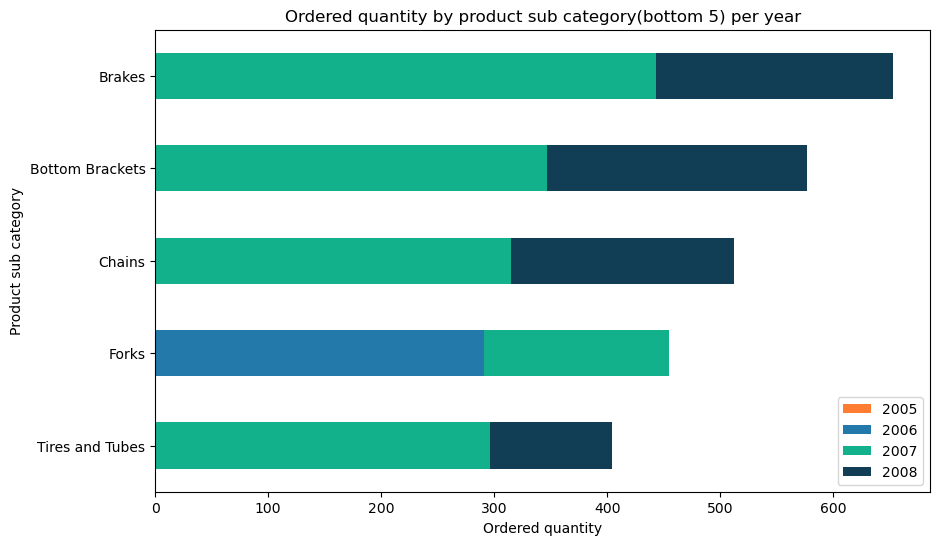

In [42]:
colorsforchart = ListedColormap(['#ff7c33', '#2279aa', '#13b18b','#113d55'])

# create the grouped stacked bar graph
mdf66= mdf66.sort_values('TotalOrders')
fig, ax = plt.subplots(figsize=(10, 6))
mdf66.plot(x="Product_Sub_Category", y=["2005", "2006",'2007','2008'],kind='barh', stacked=True, ax=ax, cmap=colorsforchart)
    
# set the axis labels and chart title
ax.set_xlabel('Ordered quantity')
ax.set_ylabel('Product sub category')
ax.set_title('Ordered quantity by product sub category(bottom 5) per year')

# display the chart
plt.show()


In [43]:
df_pn=data1.groupby(['Product_Name'])['OrderQty'].sum().reset_index(name='QtySold') 
pn=data1.groupby(['Product_Name'])['CustomerExpensesForOrderQty'].sum().reset_index(name='CustomerExpensesForOrderQty') 

df_pn = df_pn.merge(pn, on = ['Product_Name'])
df_pn=df_pn.sort_values(['QtySold'], ascending = False).head(10)
df_pn

,Product_Name,QtySold,CustomerExpensesForOrderQty
96,"Long-Sleeve Logo Jersey, L",3865,2.022131e+10
0,AWC Logo Cap,3813,4.785884e+09
217,"Sport-100 Helmet, Blue",2974,6.826150e+09
216,"Sport-100 Helmet, Black",2735,5.960932e+09
218,"Sport-100 Helmet, Red",2582,5.811464e+09
9,"Full-Finger Gloves, L",2461,1.355035e+09
6,"Classic Vest, S",2298,2.333824e+09
97,"Long-Sleeve Logo Jersey, M",2063,1.097859e+10
245,"Women's Mountain Shorts, S",2017,1.703434e+10
243,"Women's Mountain Shorts, L",1956,1.714771e+10


In [45]:
#Top 10 Products
mdf7= pd.merge(data1, df_pn, on=['Product_Name'])
c20057= mdf7.where(mdf7['OrderDate_year'] == 2005).groupby('Product_Name')['OrderQty'].sum().reset_index(name='2005')
c20067= mdf7.where(mdf7['OrderDate_year'] == 2006).groupby('Product_Name')['OrderQty'].sum().reset_index(name='2006') 
c20077= mdf7.where(mdf7['OrderDate_year'] == 2007).groupby('Product_Name')['OrderQty'].sum().reset_index(name='2007') 
c20087= mdf7.where(mdf7['OrderDate_year'] == 2008).groupby('Product_Name')['OrderQty'].sum().reset_index(name='2008')
mdf77 = mdf7.groupby(['Product_Name'])['QtySold'].mean().reset_index(name='TotalOrders') 
mdf77 = mdf77.merge(c20057, on = ['Product_Name'], how='outer')
mdf77 = mdf77.merge(c20067, on = ['Product_Name'], how='outer')
mdf77 = mdf77.merge(c20077, on = ['Product_Name'], how='outer')
mdf77 = mdf77.merge(c20087, on = ['Product_Name'], how='outer')
mdf77


,Product_Name,TotalOrders,2005,2006,2007,2008
0,AWC Logo Cap,3813.0,379.0,1309.0,1536.0,589.0
1,"Classic Vest, S",2298.0,NaN,NaN,1374.0,924.0
2,"Full-Finger Gloves, L",2461.0,NaN,1430.0,1031.0,NaN
3,"Long-Sleeve Logo Jersey, L",3865.0,391.0,1353.0,1540.0,581.0
4,"Long-Sleeve Logo Jersey, M",2063.0,168.0,713.0,881.0,301.0
5,"Sport-100 Helmet, Black",2735.0,237.0,898.0,1143.0,457.0
6,"Sport-100 Helmet, Blue",2974.0,272.0,949.0,1233.0,520.0
7,"Sport-100 Helmet, Red",2582.0,239.0,863.0,1091.0,389.0
8,"Women's Mountain Shorts, L",1956.0,NaN,NaN,1124.0,832.0
9,"Women's Mountain Shorts, S",2017.0,NaN,NaN,1134.0,883.0


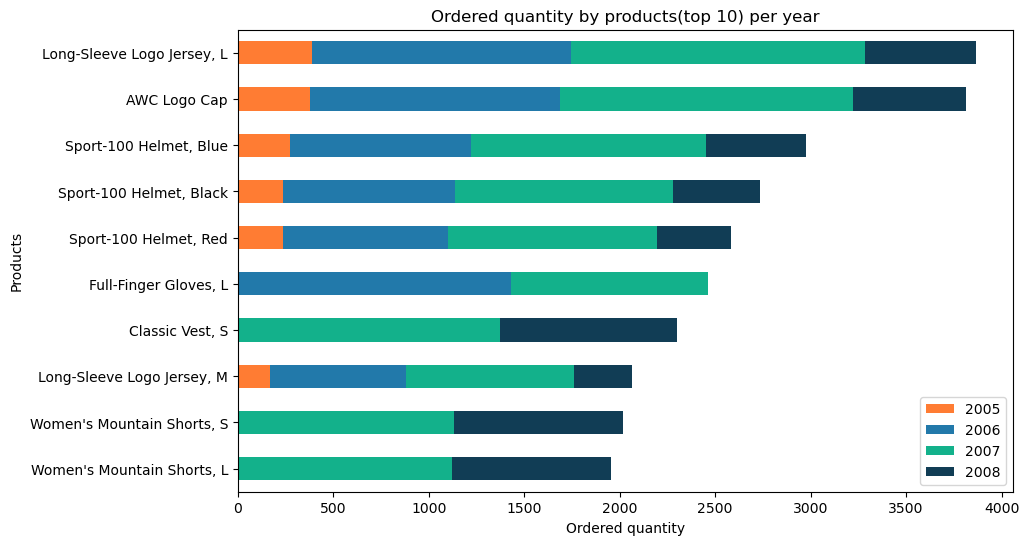

In [46]:
colorsforchart = ListedColormap(['#ff7c33', '#2279aa', '#13b18b','#113d55'])

# create the grouped stacked bar graph
mdf77= mdf77.sort_values('TotalOrders')
fig, ax = plt.subplots(figsize=(10, 6))
mdf77.plot(x="Product_Name", y=["2005", "2006",'2007','2008'],kind='barh', stacked=True, ax=ax, cmap=colorsforchart)
    
# set the axis labels and chart title
ax.set_xlabel('Ordered quantity')
ax.set_ylabel('Products')
ax.set_title('Ordered quantity by products(top 10) per year')

# display the chart
plt.show()


In [44]:
df_pn_l20=data1.groupby(['Product_Name'])['OrderQty'].sum().reset_index(name='QtySold') 
pn_l20=data1.groupby(['Product_Name'])['CustomerExpensesForOrderQty'].sum().reset_index(name='CustomerExpensesForOrderQty') 

df_pn_l20 = df_pn_l20.merge(pn_l20, on = ['Product_Name'])
df_pn_l20=df_pn_l20.sort_values(['QtySold'], ascending = True).head(10)
df_pn_l20

,Product_Name,QtySold,CustomerExpensesForOrderQty
4,"Classic Vest, L",2,322144.0
85,LL Road Seat/Saddle,2,362965.0
105,"ML Mountain Frame-W - Silver, 38",6,13121559.0
58,"LL Mountain Frame - Black, 40",7,2558195.0
89,"LL Touring Frame - Blue, 62",7,15460331.0
62,"LL Mountain Frame - Black, 52",12,3840338.0
18,"HL Mountain Frame - Black, 44",13,99044410.0
86,"LL Touring Frame - Blue, 44",14,36445725.0
92,"LL Touring Frame - Yellow, 58",25,65910164.0
94,LL Touring Handlebars,27,16750900.0


In [47]:
#Last 10 Products
mdf8= pd.merge(data1, df_pn_l20, on=['Product_Name'])
c20058= mdf8.where(mdf8['OrderDate_year'] == 2005).groupby('Product_Name')['OrderQty'].sum().reset_index(name='2005')
c20068= mdf8.where(mdf8['OrderDate_year'] == 2006).groupby('Product_Name')['OrderQty'].sum().reset_index(name='2006') 
c20078= mdf8.where(mdf8['OrderDate_year'] == 2007).groupby('Product_Name')['OrderQty'].sum().reset_index(name='2007') 
c20088= mdf8.where(mdf8['OrderDate_year'] == 2008).groupby('Product_Name')['OrderQty'].sum().reset_index(name='2008')
mdf88 = mdf8.groupby(['Product_Name'])['QtySold'].mean().reset_index(name='TotalOrders') 
mdf88 = mdf88.merge(c20058, on = ['Product_Name'], how='outer')
mdf88 = mdf88.merge(c20068, on = ['Product_Name'], how='outer')
mdf88 = mdf88.merge(c20078, on = ['Product_Name'], how='outer')
mdf88 = mdf88.merge(c20088, on = ['Product_Name'], how='outer')
mdf88

,Product_Name,TotalOrders,2005,2006,2007,2008
0,"Classic Vest, L",2.0,NaN,NaN,2.0,NaN
1,"HL Mountain Frame - Black, 44",13.0,7.0,6.0,NaN,NaN
2,"LL Mountain Frame - Black, 40",7.0,NaN,NaN,7.0,NaN
3,"LL Mountain Frame - Black, 52",12.0,NaN,NaN,12.0,NaN
4,LL Road Seat/Saddle,2.0,NaN,NaN,2.0,NaN
5,"LL Touring Frame - Blue, 44",14.0,NaN,NaN,14.0,NaN
6,"LL Touring Frame - Blue, 62",7.0,NaN,NaN,7.0,NaN
7,"LL Touring Frame - Yellow, 58",25.0,NaN,NaN,25.0,NaN
8,LL Touring Handlebars,27.0,NaN,NaN,27.0,NaN
9,"ML Mountain Frame-W - Silver, 38",6.0,NaN,NaN,6.0,NaN


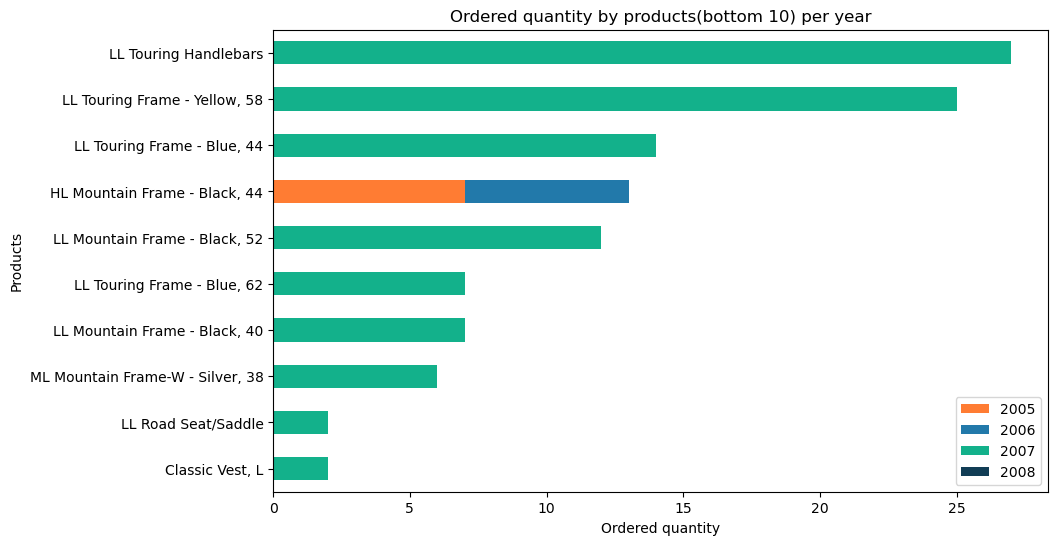

In [48]:
colorsforchart = ListedColormap(['#ff7c33', '#2279aa', '#13b18b','#113d55'])

# create the grouped stacked bar graph
mdf88= mdf88.sort_values('TotalOrders')
fig, ax = plt.subplots(figsize=(10, 6))
mdf88.plot(x="Product_Name", y=["2005", "2006",'2007','2008'],kind='barh', stacked=True, ax=ax, cmap=colorsforchart)
    
# set the axis labels and chart title
ax.set_xlabel('Ordered quantity')
ax.set_ylabel('Products')
ax.set_title('Ordered quantity by products(bottom 10) per year')

# display the chart
plt.show()
